In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [23]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

In [24]:
# Veri setinin ilk 5 satırını görüntüleyelim
df.head()

# Veri seti hakkında genel bilgi alalım
df.info()

# Veri setindeki özet istatistikleri inceleyelim
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


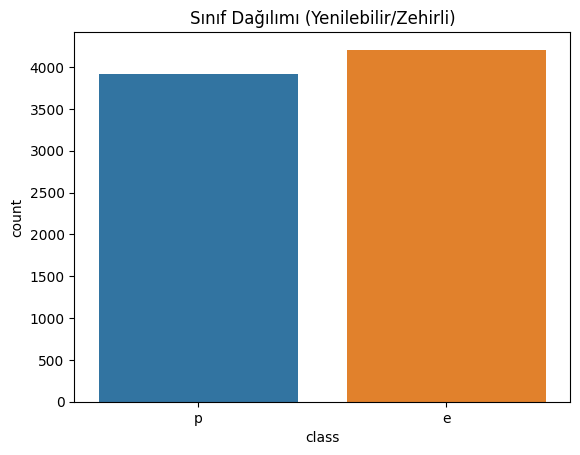

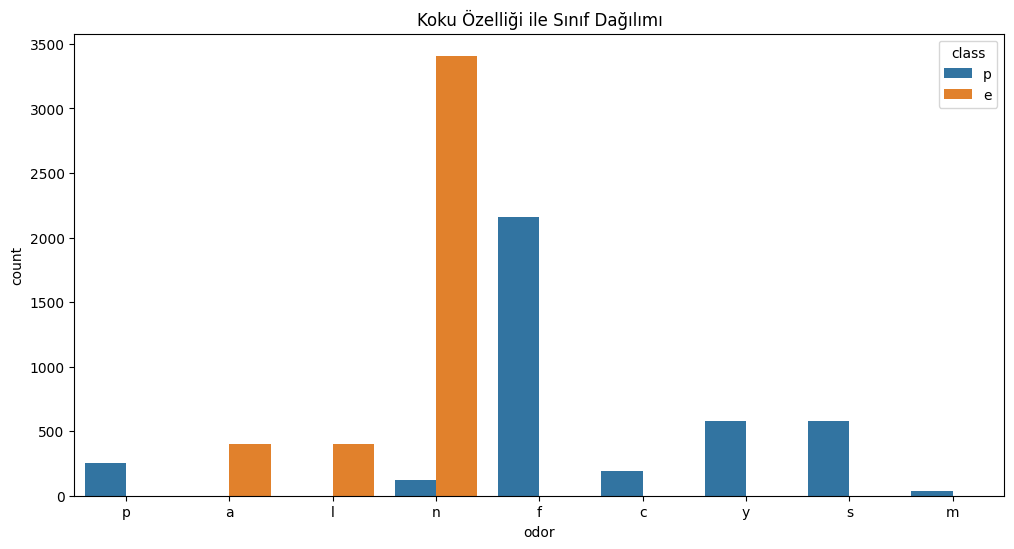

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bağımlı değişkenin (class) dağılımı
sns.countplot(x='class', data=df)
plt.title('Sınıf Dağılımı (Yenilebilir/Zehirli)')
plt.show()

# Diğer kategorik değişkenlerin bazılarını inceleyelim
plt.figure(figsize=(12,6))
sns.countplot(x='odor', data=df, hue='class')
plt.title('Koku Özelliği ile Sınıf Dağılımı')
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

# Tüm kategorik değişkenleri sayısal hale getirmek için Label Encoding
label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Veri kümesini eğitim ve test olarak bölme
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)  # Bağımsız değişkenler
y = df['class']  # Bağımlı değişken (yenilebilir/zehirli)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Doğruluk Skoru: 0.9476923076923077
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



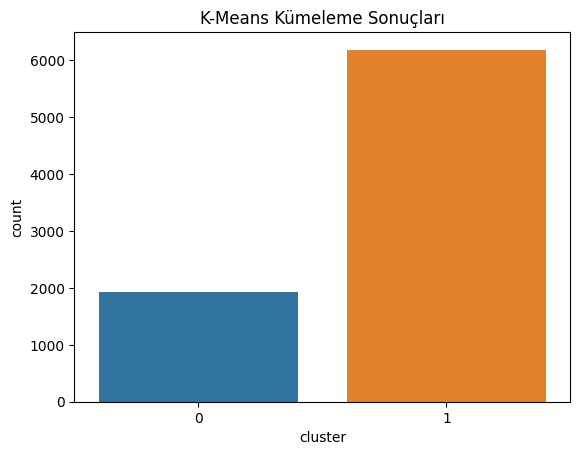

cluster     0     1
class              
0         192  4016
1        1744  2172


In [27]:
from sklearn.linear_model import LogisticRegression  # LogisticRegression sınıfını import etmelisiniz
from sklearn.metrics import accuracy_score, classification_report  # Doğruluk skoru ve sınıflandırma raporu için gerekli metrikler

# İterasyon sayısını artırarak uyarıyı çözebiliriz
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Model performansı
y_pred = model.predict(X_test)
print('Doğruluk Skoru:', accuracy_score(y_test, y_pred))
print('Sınıflandırma Raporu:')
print(classification_report(y_test, y_pred))

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# K-Means kümeleme (n_clusters=2 çünkü mantarlar iki sınıfa ayrılıyor)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

# Küme etiketlerini ekleyelim
df['cluster'] = kmeans.labels_

# Kümeleme sonuçlarını inceleyelim
sns.countplot(x='cluster', data=df)
plt.title('K-Means Kümeleme Sonuçları')
plt.show()

# Kümelerin sınıflarla nasıl eşleştiğini görelim
ct = pd.crosstab(df['class'], df['cluster'])
print(ct)